In [21]:
import pandas as pd
import networkx as nx
import cpalgorithm as cpa
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('metabolite.csv', sep=",", names=['node1','node2'])

In [4]:
df

,node1,node2
0,0,496
1,0,499
2,0,502
3,0,504
4,0,589
...,...,...
5797,1037,589
5798,1037,1034
5799,1038,249
5800,1038,589


In [5]:
df = df.apply(lambda x: x.astype(str))
G=nx.from_pandas_edgelist(df, 'node1', 'node2')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 2 columns):
node1    5802 non-null object
node2    5802 non-null object
dtypes: object(2)
memory usage: 90.8+ KB


In [15]:
be = cpa.BE()
be.detect(G)
c = be.get_pair_id()
x = be.get_coreness()

df_be = pd.DataFrame.from_dict(x, orient = 'index', columns = ['Coreness'])

df_be.reset_index(inplace=True)
df_be.rename(columns={'index': 'Nodes'}, inplace=True)

df_be_Count = pd.DataFrame(df_be.groupby('Coreness')['Nodes'].count())

df_be_Count

,Nodes
Coreness,
0.0,1035
1.0,4


In [16]:
km = cpa.KM_ER() 
km.detect(G)
c1 = be.get_pair_id()
x1 = be.get_coreness()

df_km = pd.DataFrame.from_dict(x1, orient = 'index', columns = ['Coreness'])
df_km.reset_index(inplace=True)
df_km.rename(columns={'index': 'Nodes'}, inplace=True)

df_km_count = pd.DataFrame(df_km.groupby('Coreness')['Nodes'].count())

df_km_count

,Nodes
Coreness,
0.0,1035
1.0,4


In [17]:
lsc = cpa.LapSgnCore()
lsc.detect(G)
c3 = lsc.get_pair_id()
x3 = lsc.get_coreness()

df_lsc = pd.DataFrame.from_dict(x3, orient = 'index', columns = ['Coreness'])
df_lsc.reset_index(inplace=True)
df_lsc.rename(columns={'index': 'Nodes'}, inplace=True)

df_lsc_count = pd.DataFrame(df_lsc.groupby('Coreness')['Nodes'].count())

df_lsc_count

,Nodes
Coreness,
0.0,594
1.0,445


In [18]:
lrc = cpa.LowRankCore()
lrc.detect(G)
c2 = lrc.get_pair_id()
x2 = lrc.get_coreness()

df_lrc = pd.DataFrame.from_dict(x2, orient = 'index', columns = ['Coreness'])
df_lrc.reset_index(inplace=True)
df_lrc.rename(columns={'index': 'Nodes'}, inplace=True)

df_lrc_Count = pd.DataFrame(df_lrc.groupby('Coreness')['Nodes'].count())

df_lrc_Count

,Nodes
Coreness,
0,935
1,104


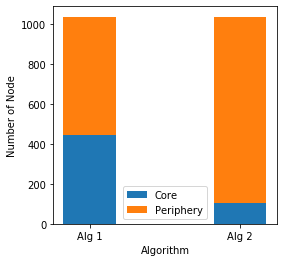

In [23]:
# params for the visualization
c_n = 2
c_pos = np.arange(c_n) 
width = 0.35         

# creating framework for the figure
fig = plt.figure(figsize=(4, 4))

# populate the figure
ax = fig.add_subplot(1, 1, 1)


core = (445, 104)
per = (594, 935)
# plot the data
ax.bar(c_pos, core, width, label='Core')
ax.bar(c_pos, per, width, bottom=core,  label='Periphery')

# axes labels
ax.set_xlabel('Algorithm')
ax.set_ylabel('Number of Node')

# axes ticks
ax.set_xticks((0, 1))
ax.set_xticklabels(('Alg 1', 'Alg 2'))

# legend
ax.legend(loc='best')

plt.show()
